In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
from imzy import get_reader, discover_plugins
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from imspy_data.workflows.writer import write_from_reader
from imspy_data.convert.bruker import BrukerSerfRReader
from imspy_data.workflows.writer import write_from_reader

In [21]:
path = Path(r"Y:\spraggins\sandbox\collem1\MRMS\2025FebBrukerVisitMatch\VU K133 NEG\VU K133 NEG.d.d")
reader = BrukerSerfRReader(path)
# reader = get_reader(path)

2025-10-13 06:50:21.972 | DEBUG    | imspy_data.convert.bruker.reader:__init__:262 - Created connection to the SQLite database (Y:\spraggins\sandbox\collem1\MRMS\2025FebBrukerVisitMatch\VU K133 NEG\VU K133 NEG.d.d\peaks.sqlite)...
2025-10-13 06:50:22.241 | DEBUG    | imspy_data.convert.reader:set_processing_args:563 - Initialized extraction parameters
2025-10-13 06:50:22.244 | DEBUG    | imspy_data.convert.bruker.reader:__init__:267 - Collected basic metadata (mz=143.63-3000.00)
2025-10-13 06:50:22.275 | DEBUG    | imspy_data.convert.bruker.reader:__init__:278 - Initialization took 304ms 209μs


In [ ]:
write_from_reader

BrukerSerfRReader<n_px=64136; n_dt=1 size=617x104; mz=143.63-3000.00; rois=[0]>

In [39]:
reader.mad_threshold = 0.1
frame = reader.get_frame(0)
# frame = frame.tofmt("dense")
frame.stats

'Sparsity: 0.7113% | Density 99.2887% | NNZ: 1,978,122 | FMT: csc | 15.1M | Dense: 7.6M'

In [39]:
x1, y1 = reader.get_spectrum(0)
x2, y2 = reader.get_spectrum(reader.pixels[-1])

In [47]:
a = np.random.randint(0, 1000, size=10000)
%timeit -r 3 -n 10 np.atleast_2d(a)
%timeit -r 3 -n 10 a[:, None]

1.66 μs ± 549 ns per loop (mean ± std. dev. of 3 runs, 10 loops each)
333 ns ± 74.1 ns per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [44]:
np.count_nonzero(y <= 3e3)

43055

In [16]:
x, y = reader.get_spectrum(200)
x.shape

(1992294,)

(778.0, 780.0)

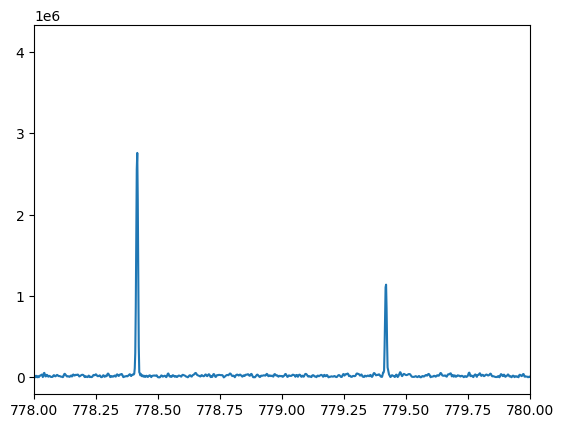

In [13]:
x, y = reader.get_spectrum(0)
plt.plot(x, y)
plt.xlim(778, 780)

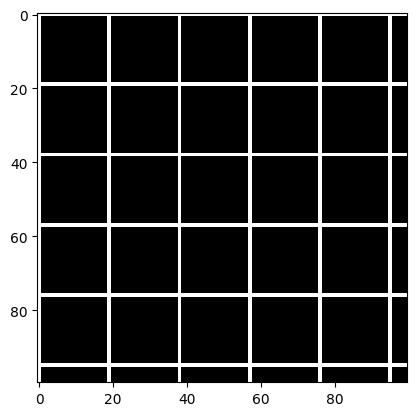

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def impulse_grid(shape, spacing):
    """
    Create a 2D array with regularly spaced 1's (Dirac comb).

    Parameters
    ----------
    shape : tuple (n_rows, n_cols)
        Size of the output array.
    spacing : int or tuple (row_spacing, col_spacing)
        Spacing between impulses (in pixels).

    Returns
    -------
    grid : ndarray of shape (n_rows, n_cols)
        Array with ones at positions that are multiples of spacing,
        zeros elsewhere.
    """
    n, m = shape
    if isinstance(spacing, int):
        rstep, cstep = spacing, spacing
    else:
        rstep, cstep = spacing

    grid = np.zeros((n, m), dtype=int)
    grid[::rstep, ::cstep] = 1
    return grid


def cross_grid(shape, spacing=None):
    """
    Create a 2D cross pattern with ones in the central row and column.

    Parameters
    ----------
    shape : tuple (n_rows, n_cols)
        Size of the output array.
    spacing : int or None
        If given, the cross is placed at the center index = spacing//2.
        If None, the cross is at the array center (n//2, m//2).

    Returns
    -------
    grid : ndarray of shape (n, m)
    """
    grid = np.zeros(shape, dtype=int)

    if spacing is None:
        row = shape[0] // 2
        col = shape[1] // 2
    else:
        row = spacing // 2
        col = spacing // 2

    grid[row, :] = 1
    grid[:, col] = 1
    return grid


def repeating_cross_grid(shape, spacing=3):
    """
    Create a 2D grid with repeating crosses ("+" shapes).

    Parameters
    ----------
    shape : tuple of int
        (n_rows, n_cols) of the output array.
    spacing : int
        Distance between cross centers.

    Returns
    -------
    grid : ndarray
        Array of shape `shape` with 1's forming repeating crosses.
    """
    n, m = shape
    grid = np.zeros((n, m), dtype=int)

    # centers of crosses at multiples of spacing
    for r in range(0, n, spacing):
        grid[r, :] = 1   # horizontal line
    for c in range(0, m, spacing):
        grid[:, c] = 1   # vertical line

    return grid

g = repeating_cross_grid((100, 100), spacing=19)
plt.imshow(g, cmap='gray', interpolation='nearest')